In [27]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [28]:
def preprocessing(img):
    #img = img[60:135,:,:]
    #img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    #img = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.resize(img,(60,60))
    #img = img / 255
    return img

In [29]:
image = cv2.imread(r"C:\Users\bathu\image_segmentation.jpg")
if image is None:
    print("Error: Could not read image.")
else:
    print('read')

read


In [30]:
image_cat = cv2.imread(r"C:\Users\bathu\cat_segmentation.jpg")
if image is None:
    print("Error: Could not read image.")
else:
    print('read')

read


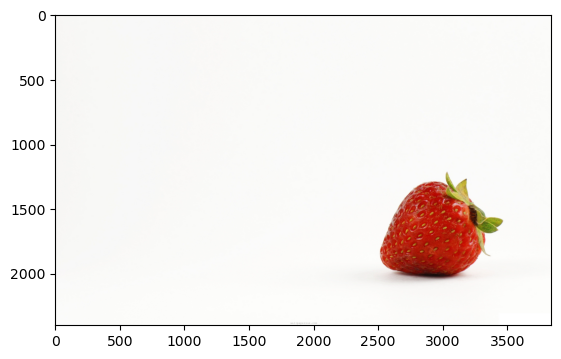

In [31]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#plt.axis('off')

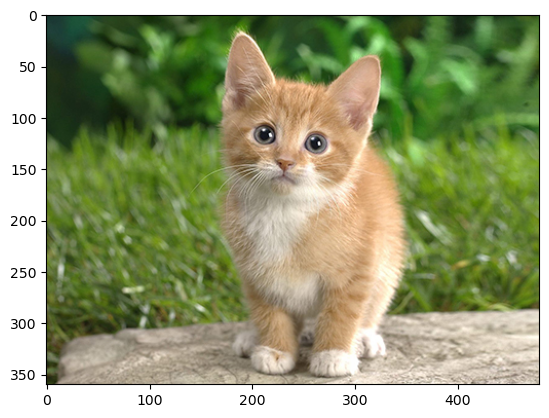

In [32]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(image_cat, cv2.COLOR_BGR2RGB))
#plt.axis('off')

In [33]:
img = preprocessing(image)

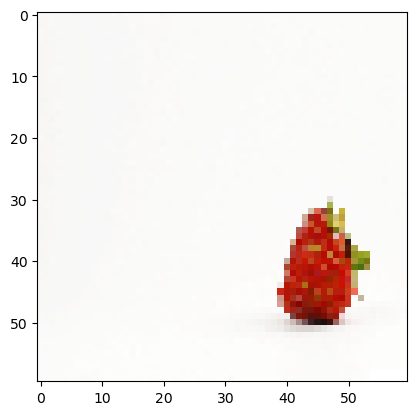

In [34]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [35]:
img

array([[[245, 247, 248],
        [246, 248, 248],
        [246, 248, 248],
        ...,
        [249, 251, 251],
        [250, 251, 251],
        [251, 251, 251]],

       [[245, 247, 248],
        [245, 246, 249],
        [247, 249, 249],
        ...,
        [251, 251, 251],
        [250, 251, 251],
        [249, 251, 251]],

       [[244, 246, 248],
        [245, 247, 248],
        [246, 248, 248],
        ...,
        [250, 251, 251],
        [249, 251, 251],
        [249, 251, 251]],

       ...,

       [[251, 251, 251],
        [250, 251, 251],
        [249, 251, 251],
        ...,
        [251, 253, 253],
        [251, 253, 253],
        [251, 253, 253]],

       [[251, 251, 251],
        [250, 251, 251],
        [249, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [36]:
cat = preprocessing(image_cat)

In [37]:
cat

array([[[ 49,  56,  28],
        [ 50,  58,  27],
        [ 55,  71,  29],
        ...,
        [ 38,  89,  59],
        [ 31,  98,  67],
        [ 31,  85,  55]],

       [[ 54,  60,  30],
        [ 55,  61,  29],
        [ 54,  71,  28],
        ...,
        [ 33,  81,  42],
        [ 40, 100,  60],
        [ 45, 117,  75]],

       [[ 59,  65,  33],
        [ 56,  63,  29],
        [ 52,  70,  25],
        ...,
        [ 26,  66,  34],
        [ 39, 104,  64],
        [ 56, 129,  89]],

       ...,

       [[ 50, 103,  86],
        [ 61,  92,  88],
        [133, 148, 160],
        ...,
        [167, 183, 196],
        [194, 211, 224],
        [204, 220, 231]],

       [[ 31,  65,  66],
        [ 64,  87,  90],
        [111, 125, 138],
        ...,
        [148, 161, 175],
        [151, 163, 178],
        [187, 202, 215]],

       [[ 15,  49,  40],
        [ 76,  95, 103],
        [145, 161, 174],
        ...,
        [181, 196, 208],
        [197, 212, 223],
        [164, 179, 188]]

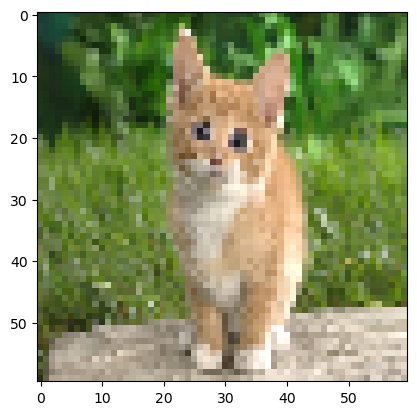

In [38]:
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))


In [39]:
# spectral clustering with RGB without considering distance in its edge weight

In [40]:
import math

def calculate_weight(value1, value2):
    sigma = 60  # Hard-coded value of sigma which is subject to change
    distance_squared = sum((a - b) ** 2 for a, b in zip(value1, value2))
    return math.exp(-distance_squared / (2 * sigma ** 2))


In [41]:
import networkx as nx


In [42]:
G = nx.Graph()

In [43]:
#nodes 
for x in range(60):
    for y in range(60):
        node_id = (x, y)
        values = tuple(img[x, y])
        G.add_node(node_id, values=values)

#edges
for x in range(60):
    for y in range(60):
        for px in range(x, 60):
            for py in range(60):
                if px == x and py <= y:
                    # Avoid adding an edge twice in the case of the same row
                    continue
                node_id = (x, y)
                other_node_id = (px, py)
                weight = calculate_weight(G.nodes[node_id]['values'], G.nodes[other_node_id]['values'])
                G.add_edge(node_id, other_node_id, weight=weight)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


C:\Users\bathu\AppData\Local\Temp\ipykernel_32296\282208329.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  distance_squared = sum((a - b) ** 2 for a, b in zip(value1, value2))


Number of nodes: 3600
Number of edges: 6478200


In [44]:
size = 60
W = np.zeros((size * size, size * size))
D = np.zeros((size * size, size * size))

for i, node_i in enumerate(G.nodes()):
    for j, node_j in enumerate(G.nodes()):
        if G.has_edge(node_i, node_j):
            W[i, j] = G[node_i][node_j]['weight']
            D[i, i] += G[node_i][node_j]['weight']

In [45]:
df = pd.DataFrame(W)

In [46]:
df

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,0.000000e+00,1.430724e-08,1.430724e-08,1.430724e-08,1.430724e-08,1.430724e-08,9.998611e-01,1.283749e-04,1.647554e-08,1.535529e-08,...,3.708930e-12,4.571179e-12,3.708930e-12,4.571179e-12,7.945048e-12,7.945048e-12,7.945048e-12,7.945048e-12,7.945048e-12,7.945048e-12
1,1.430724e-08,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.995834e-01,1.195963e-04,1.283749e-04,1.196129e-04,...,3.225284e-12,3.977305e-12,3.225284e-12,3.977305e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12
2,1.430724e-08,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.995834e-01,1.195963e-04,1.283749e-04,1.196129e-04,...,3.225284e-12,3.977305e-12,3.225284e-12,3.977305e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12
3,1.430724e-08,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.995834e-01,1.195963e-04,1.283749e-04,1.196129e-04,...,3.225284e-12,3.977305e-12,3.225284e-12,3.977305e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12
4,1.430724e-08,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,9.995834e-01,1.195963e-04,1.283749e-04,1.196129e-04,...,3.225284e-12,3.977305e-12,3.225284e-12,3.977305e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,7.945048e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,8.512849e-12,6.918615e-12,6.033161e-12,6.464327e-12,...,3.005982e-12,2.434911e-12,3.005982e-12,2.434911e-12,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
3596,7.945048e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,8.512849e-12,6.918615e-12,6.033161e-12,6.464327e-12,...,3.005982e-12,2.434911e-12,3.005982e-12,2.434911e-12,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
3597,7.945048e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,8.512849e-12,6.918615e-12,6.033161e-12,6.464327e-12,...,3.005982e-12,2.434911e-12,3.005982e-12,2.434911e-12,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
3598,7.945048e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,6.924383e-12,8.512849e-12,6.918615e-12,6.033161e-12,6.464327e-12,...,3.005982e-12,2.434911e-12,3.005982e-12,2.434911e-12,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00


Text(0.5, 1.0, 'Weighted Adjacency Matrix')

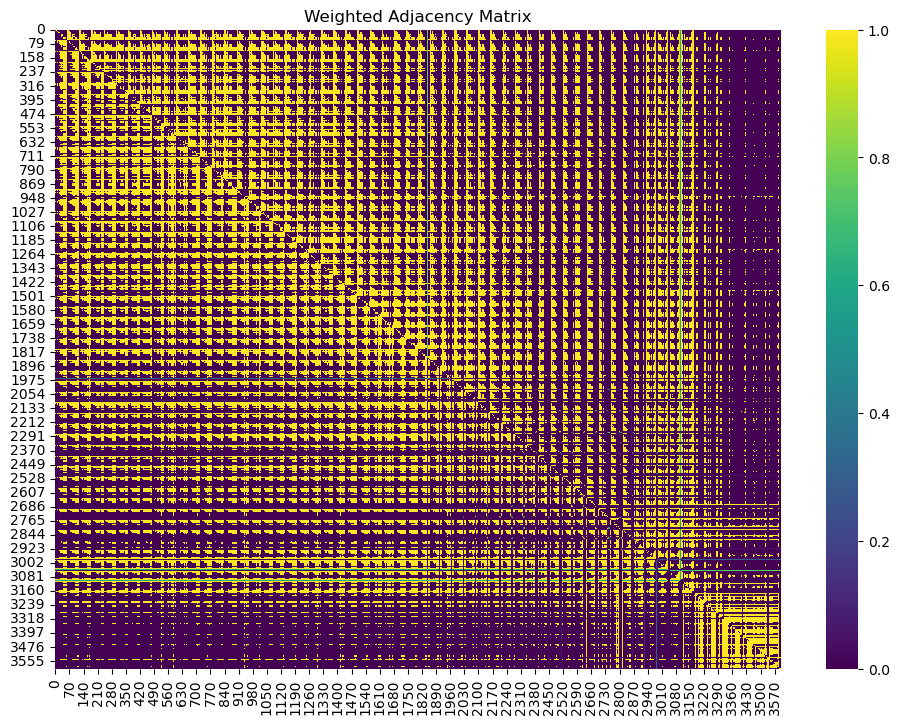

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11.7, 8.3))  
sns.heatmap(df, cmap="viridis")
plt.title("Weighted Adjacency Matrix")

In [49]:
from sklearn.cluster import SpectralClustering

def cluster_graph(adjacency_matrix):
    adjacency_matrix = np.array(adjacency_matrix)
    
    spectral = SpectralClustering(n_clusters=2, affinity='precomputed', assign_labels='kmeans')
    
    labels = spectral.fit_predict(adjacency_matrix)
    
    return labels

In [50]:
clusters = cluster_graph(W)
print(clusters)

C:\Users\bathu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


[0 0 0 ... 1 1 1]


In [51]:
sum(clusters)

155

In [52]:
reshaped_assignments = clusters.reshape((60, 60))


In [53]:
d = pd.DataFrame(reshaped_assignments)

Text(0.5, 1.0, 'Segmented Part')

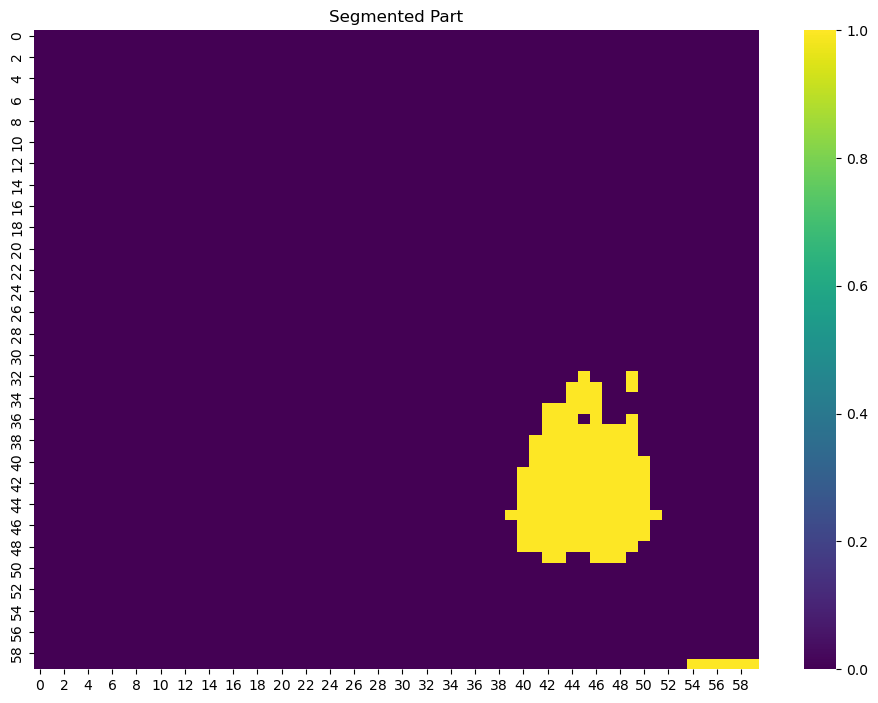

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the matrix
plt.figure(figsize=(11.7, 8.3))  # A4 size in inches
sns.heatmap(d, cmap="viridis")
plt.title("Segmented Part")

In [55]:
G = nx.Graph()

In [56]:
#nodes 
for x in range(60):
    for y in range(60):
        node_id = (x, y)
        values = tuple(cat[x, y])
        G.add_node(node_id, values=values)

#edges
for x in range(60):
    for y in range(60):
        for px in range(x, 60):
            for py in range(60):
                if px == x and py <= y:
                    # Avoid adding an edge twice in the case of the same row
                    continue
                node_id = (x, y)
                other_node_id = (px, py)
                weight = calculate_weight(G.nodes[node_id]['values'], G.nodes[other_node_id]['values'])
                G.add_edge(node_id, other_node_id, weight=weight)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


C:\Users\bathu\AppData\Local\Temp\ipykernel_32296\282208329.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  distance_squared = sum((a - b) ** 2 for a, b in zip(value1, value2))


Number of nodes: 3600
Number of edges: 6478200


In [57]:
size = 60
W = np.zeros((size * size, size * size))
D = np.zeros((size * size, size * size))

for i, node_i in enumerate(G.nodes()):
    for j, node_j in enumerate(G.nodes()):
        if G.has_edge(node_i, node_j):
            W[i, j] = G[node_i][node_j]['weight']
            D[i, i] += G[node_i][node_j]['weight']

In [58]:
df = pd.DataFrame(W)

Text(0.5, 1.0, 'Weighted Adjacency Matrix')

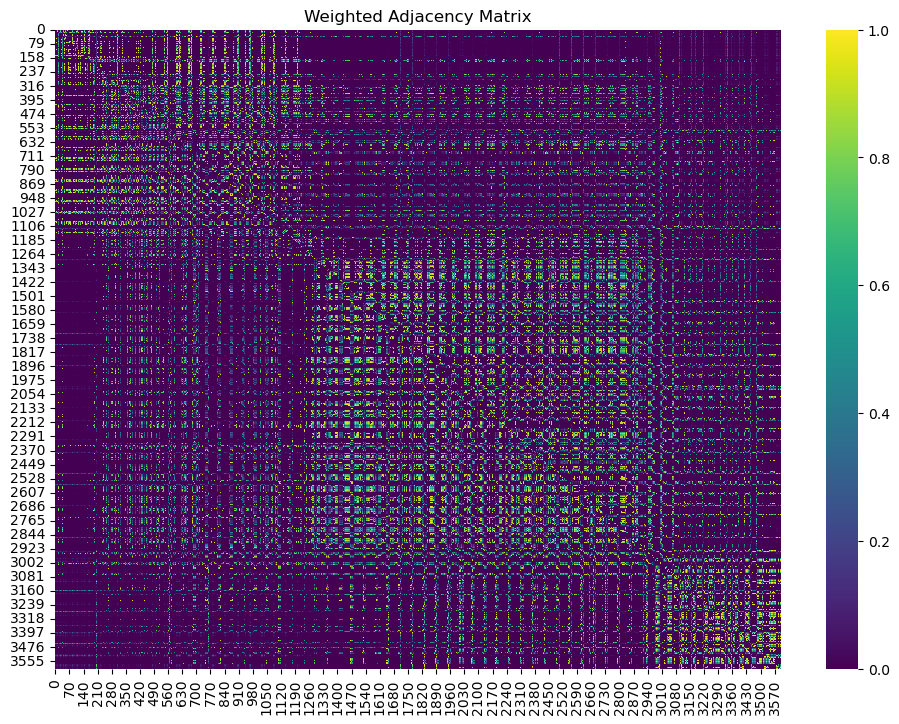

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11.7, 8.3))  
sns.heatmap(df, cmap="viridis")
plt.title("Weighted Adjacency Matrix")

In [60]:
from sklearn.cluster import SpectralClustering

def cluster_graph(adjacency_matrix):
    adjacency_matrix = np.array(adjacency_matrix)
    
    spectral = SpectralClustering(n_clusters=2, affinity='precomputed', assign_labels='kmeans')
    
    labels = spectral.fit_predict(adjacency_matrix)
    
    return labels

In [61]:
clusters = cluster_graph(W)
print(clusters)

C:\Users\bathu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


[1 1 1 ... 1 1 1]


In [62]:
sum(clusters)

1422

In [63]:
reshaped_assignments = clusters.reshape((60, 60))


In [64]:
d = pd.DataFrame(reshaped_assignments)

Text(0.5, 1.0, 'Segmented Part')

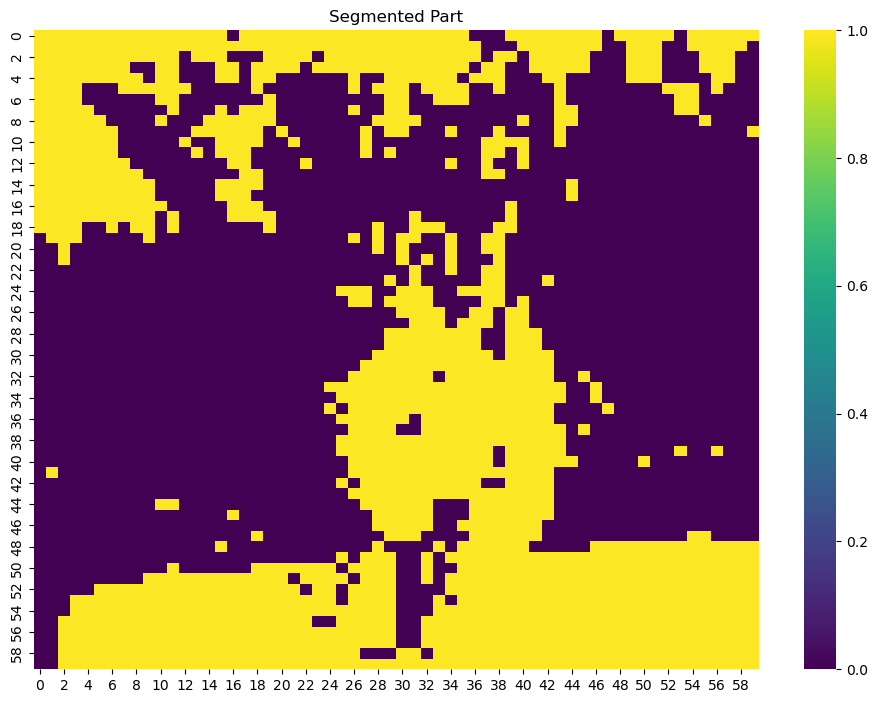

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the matrix
plt.figure(figsize=(11.7, 8.3))  # A4 size in inches
sns.heatmap(d, cmap="viridis")
plt.title("Segmented Part")

In [66]:
# try with hsv 

In [43]:
def preprocessing1(img):
    #img = img[60:135,:,:]
    img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    #img = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.resize(img,(60,60)) # use 32
    #img = img / 255
    return img

In [44]:
cat = preprocessing1(image_cat)

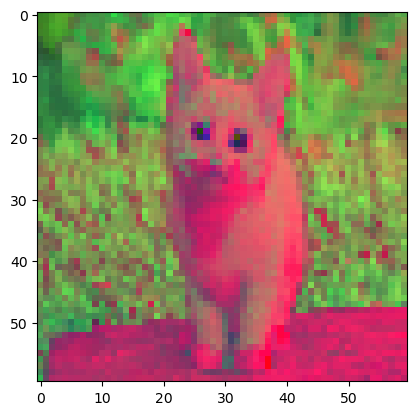

In [45]:
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))


In [46]:
img = preprocessing1(image)

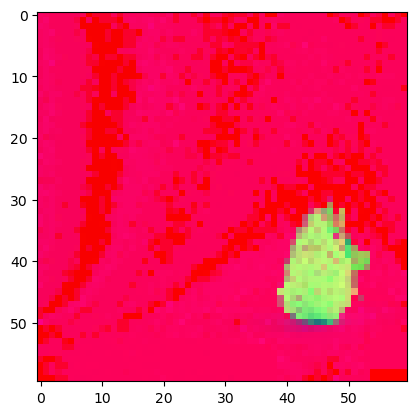

In [47]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [48]:
G = nx.Graph()

In [49]:
#nodes 
for x in range(60):
    for y in range(60):
        node_id = (x, y)
        values = tuple(img[x, y])
        G.add_node(node_id, values=values)

#edges
for x in range(60):
    for y in range(60):
        for px in range(x, 60):
            for py in range(60):
                if px == x and py <= y:
                    # Avoid adding an edge twice in the case of the same row
                    continue
                node_id = (x, y)
                other_node_id = (px, py)
                weight = calculate_weight(G.nodes[node_id]['values'], G.nodes[other_node_id]['values'])
                G.add_edge(node_id, other_node_id, weight=weight)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


C:\Users\bathu\AppData\Local\Temp\ipykernel_43692\282208329.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  distance_squared = sum((a - b) ** 2 for a, b in zip(value1, value2))


Number of nodes: 3600
Number of edges: 6478200


In [50]:
size = 60
W = np.zeros((size * size, size * size))
D = np.zeros((size * size, size * size))

for i, node_i in enumerate(G.nodes()):
    for j, node_j in enumerate(G.nodes()):
        if G.has_edge(node_i, node_j):
            W[i, j] = G[node_i][node_j]['weight']
            D[i, i] += G[node_i][node_j]['weight']

In [51]:
df = pd.DataFrame(W)

Text(0.5, 1.0, 'Weighted Adjacency Matrix')

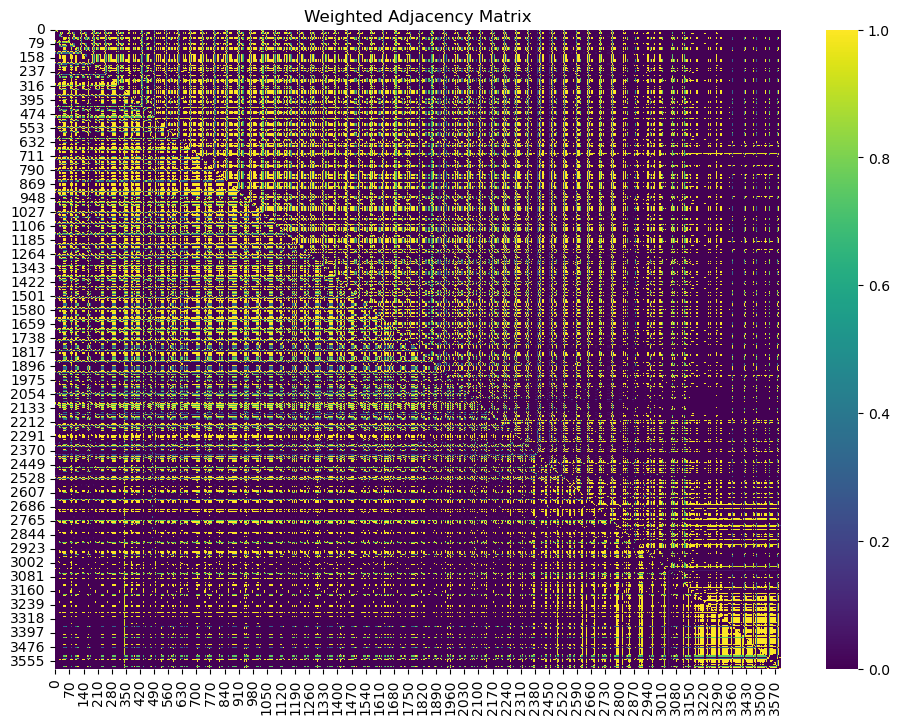

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11.7, 8.3))  
sns.heatmap(df, cmap="viridis")
plt.title("Weighted Adjacency Matrix")

In [53]:
from sklearn.cluster import SpectralClustering

def cluster_graph(adjacency_matrix):
    adjacency_matrix = np.array(adjacency_matrix)
    
    spectral = SpectralClustering(n_clusters=2, affinity='precomputed', assign_labels='kmeans')
    
    labels = spectral.fit_predict(adjacency_matrix)
    
    return labels

In [54]:
clusters = cluster_graph(W)
print(clusters)

C:\Users\bathu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


[0 0 0 ... 1 1 1]


In [55]:
sum(clusters)

12

In [56]:
reshaped_assignments = clusters.reshape((60, 60))


In [57]:
d = pd.DataFrame(reshaped_assignments)

Text(0.5, 1.0, 'Segmented Part')

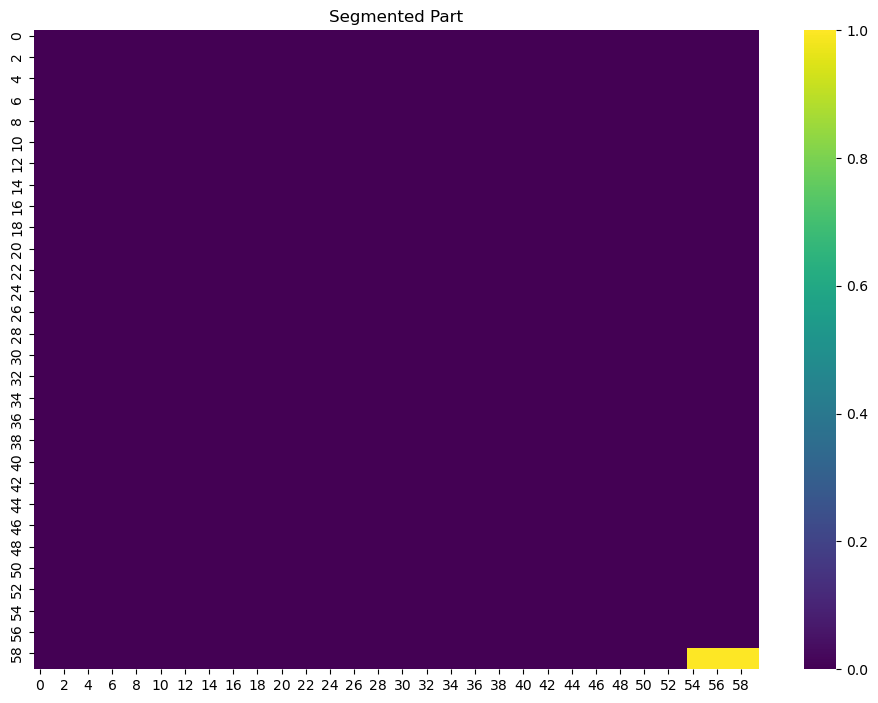

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the matrix
plt.figure(figsize=(11.7, 8.3))  # A4 size in inches
sns.heatmap(d, cmap="viridis")
plt.title("Segmented Part")

In [59]:
G = nx.Graph()

In [60]:
#nodes 
for x in range(60):
    for y in range(60):
        node_id = (x, y)
        values = tuple(cat[x, y])
        G.add_node(node_id, values=values)

#edges
for x in range(60):
    for y in range(60):
        for px in range(x, 60):
            for py in range(60):
                if px == x and py <= y:
                    # Avoid adding an edge twice in the case of the same row
                    continue
                node_id = (x, y)
                other_node_id = (px, py)
                weight = calculate_weight(G.nodes[node_id]['values'], G.nodes[other_node_id]['values'])
                G.add_edge(node_id, other_node_id, weight=weight)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

C:\Users\bathu\AppData\Local\Temp\ipykernel_43692\282208329.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  distance_squared = sum((a - b) ** 2 for a, b in zip(value1, value2))


Number of nodes: 3600
Number of edges: 6478200


In [61]:
size = 60
W = np.zeros((size * size, size * size))
D = np.zeros((size * size, size * size))

for i, node_i in enumerate(G.nodes()):
    for j, node_j in enumerate(G.nodes()):
        if G.has_edge(node_i, node_j):
            W[i, j] = G[node_i][node_j]['weight']
            D[i, i] += G[node_i][node_j]['weight']

In [62]:
df = pd.DataFrame(W)

Text(0.5, 1.0, 'Weighted Adjacency Matrix')

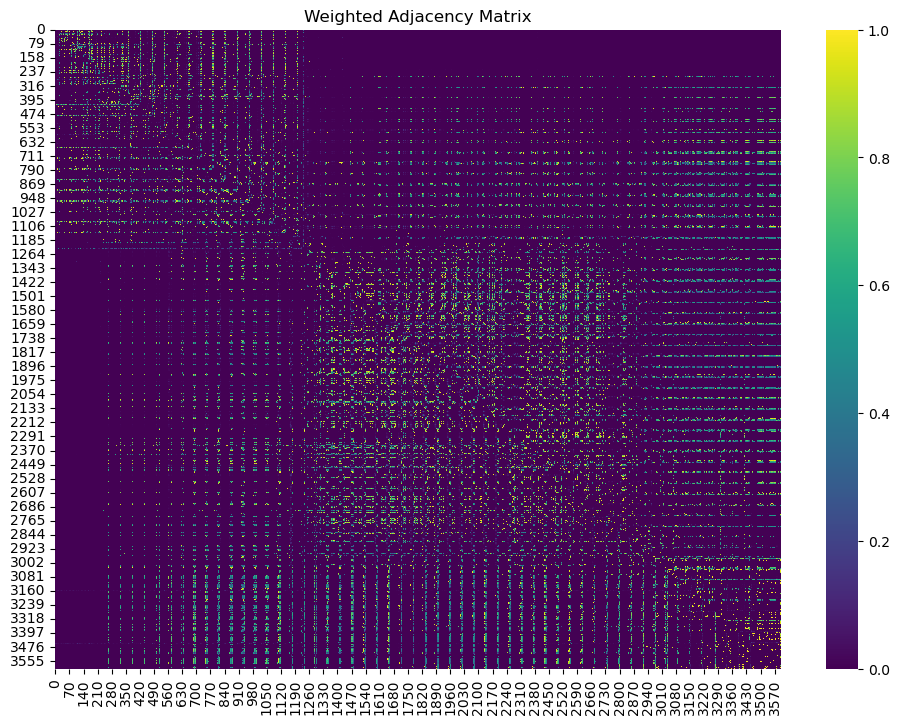

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11.7, 8.3))  
sns.heatmap(df, cmap="viridis")
plt.title("Weighted Adjacency Matrix")

In [64]:
from sklearn.cluster import SpectralClustering

def cluster_graph(adjacency_matrix):
    adjacency_matrix = np.array(adjacency_matrix)
    
    spectral = SpectralClustering(n_clusters=2, affinity='precomputed', assign_labels='kmeans')
    
    labels = spectral.fit_predict(adjacency_matrix)
    
    return labels

In [65]:
clusters = cluster_graph(W)
print(clusters)

C:\Users\bathu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


[1 1 1 ... 0 0 0]


In [66]:
sum(clusters)

953

In [67]:
reshaped_assignments = clusters.reshape((60, 60))


In [68]:
d = pd.DataFrame(reshaped_assignments)

Text(0.5, 1.0, 'Segmented Part')

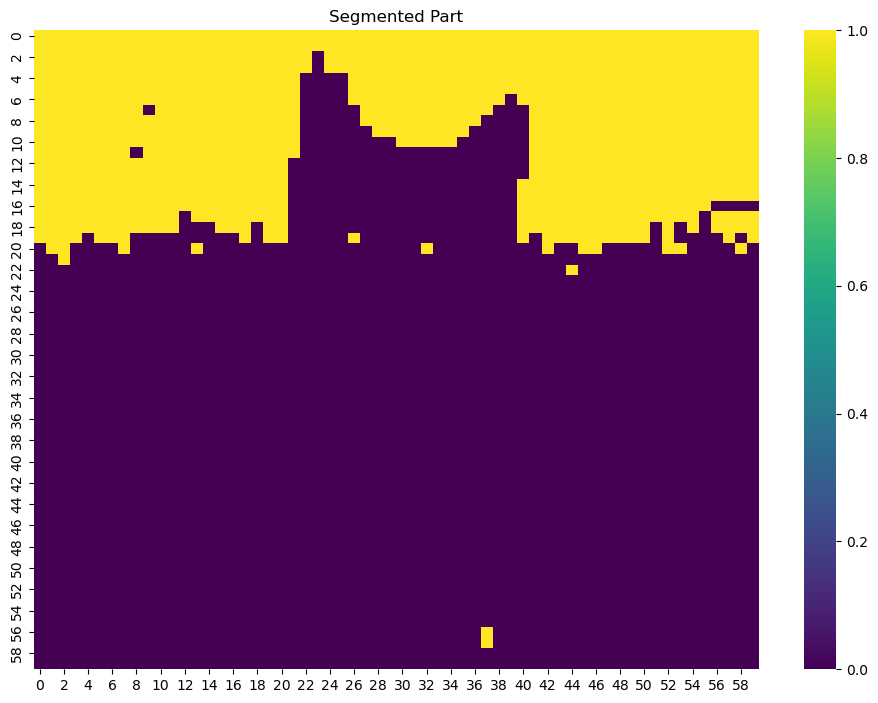

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the matrix
plt.figure(figsize=(11.7, 8.3))  # A4 size in inches
sns.heatmap(d, cmap="viridis")
plt.title("Segmented Part")

In [70]:
def preprocessing2(img):
    # Cropping and other preprocessing steps can be applied here if needed
    # img = img[60:135,:,:]

    # Convert the image to grayscale instead of HSV
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Additional preprocessing steps like GaussianBlur can be included here
    # img = cv2.GaussianBlur(img, (3, 3), 0)

    # Resize the image
    img = cv2.resize(img, (60, 60))  # use 32 for smaller size

    # Normalization can be applied if necessary
    # img = img / 255

    return img

In [71]:
cat = preprocessing2(image_cat)

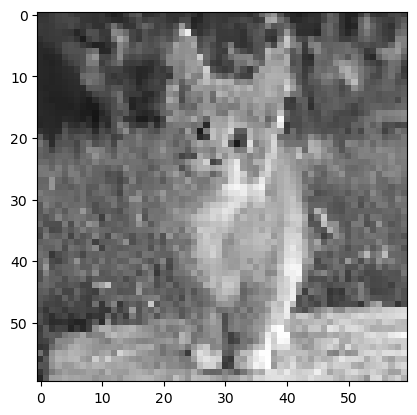

In [72]:
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))


In [73]:
# greyscale worst 

In [74]:
# replicate the results of sklearn image

In [75]:
# rgb

In [76]:
img = preprocessing(image)

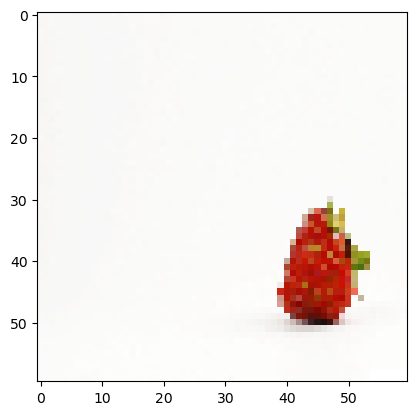

In [78]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [79]:
G = nx.Graph()

In [80]:
#nodes 
for x in range(60):
    for y in range(60):
        node_id = (x, y)
        values = tuple(img[x, y])
        G.add_node(node_id, values=values)

#edges
for x in range(60):
    for y in range(60):
        for px in range(x, 60):
            for py in range(60):
                if px == x and py <= y:
                    # Avoid adding an edge twice in the case of the same row
                    continue
                node_id = (x, y)
                other_node_id = (px, py)
                weight = calculate_weight(G.nodes[node_id]['values'], G.nodes[other_node_id]['values'])
                G.add_edge(node_id, other_node_id, weight=weight)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


C:\Users\bathu\AppData\Local\Temp\ipykernel_43692\282208329.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  distance_squared = sum((a - b) ** 2 for a, b in zip(value1, value2))


Number of nodes: 3600
Number of edges: 6478200


In [81]:
size = 60
W = np.zeros((size * size, size * size))
D = np.zeros((size * size, size * size))

for i, node_i in enumerate(G.nodes()):
    for j, node_j in enumerate(G.nodes()):
        if G.has_edge(node_i, node_j):
            W[i, j] = G[node_i][node_j]['weight']
            D[i, i] += G[node_i][node_j]['weight']

In [82]:
df = pd.DataFrame(W)

Text(0.5, 1.0, 'Weighted Adjacency Matrix')

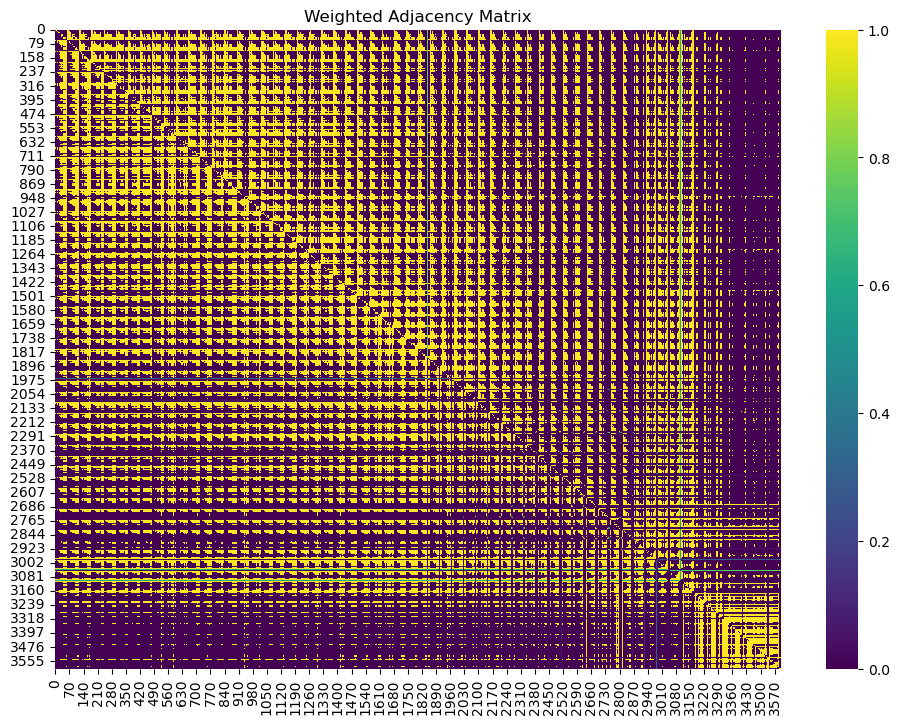

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11.7, 8.3))  
sns.heatmap(df, cmap="viridis")
plt.title("Weighted Adjacency Matrix")

In [84]:
import numpy as np
from numpy.linalg import eigh
from sklearn.cluster import KMeans

In [85]:
def spectral_clustering_np(W, D, n_clusters=2):
    # Step 1: Create the Laplacian Matrix
    laplacian = D - W

    # Step 2: Eigen Decomposition of the Laplacian Matrix
    eigenvalues, eigenvectors = eigh(laplacian)

    # Step 3: Select the top k eigenvectors
    idx = np.argsort(eigenvalues)[:n_clusters]
    selected_eigenvectors = eigenvectors[:, idx]

    # Step 4: K-means on the selected eigenvectors
    kmeans = KMeans(n_clusters=n_clusters).fit(selected_eigenvectors)
    labels = kmeans.labels_

    return labels

In [86]:
clusters = spectral_clustering_np(W,D,n_clusters=2)
print(clusters)

C:\Users\bathu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bathu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


[0 0 0 ... 0 0 0]


In [87]:
sum(clusters)

1

In [88]:
import inspect
from sklearn.cluster import SpectralClustering

print(inspect.getsource(SpectralClustering))


class SpectralClustering(ClusterMixin, BaseEstimator):
    """Apply clustering to a projection of the normalized Laplacian.

    In practice Spectral Clustering is very useful when the structure of
    the individual clusters is highly non-convex, or more generally when
    a measure of the center and spread of the cluster is not a suitable
    description of the complete cluster, such as when clusters are
    nested circles on the 2D plane.

    If the affinity matrix is the adjacency matrix of a graph, this method
    can be used to find normalized graph cuts [1]_, [2]_.

    When calling ``fit``, an affinity matrix is constructed using either
    a kernel function such the Gaussian (aka RBF) kernel with Euclidean
    distance ``d(X, X)``::

            np.exp(-gamma * d(X,X) ** 2)

    or a k-nearest neighbors connectivity matrix.

    Alternatively, a user-provided affinity matrix can be specified by
    setting ``affinity='precomputed'``.

    Read more in the :ref:`User Guide <sp

In [89]:
import numpy as np
from scipy.linalg import LinAlgError, qr, svd
from scipy.sparse import csc_matrix
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.manifold import spectral_embedding
from sklearn.cluster import k_means
from sklearn.utils import check_random_state, as_float_array

In [93]:
def cluster_qr(vectors):
    k = vectors.shape[1]
    _, _, piv = qr(vectors.T, pivoting=True)
    ut, _, v = svd(vectors[piv[:k], :].T)
    vectors = abs(np.dot(vectors, np.dot(ut, v.conj())))
    return vectors.argmax(axis=1)

def discretize(vectors, copy=True, max_svd_restarts=30, n_iter_max=20, random_state=None):
    random_state = check_random_state(random_state)
    vectors = as_float_array(vectors, copy=copy)
    eps = np.finfo(float).eps
    n_samples, n_components = vectors.shape

    norm_ones = np.sqrt(n_samples)
    for i in range(vectors.shape[1]):
        vectors[:, i] = (vectors[:, i] / np.linalg.norm(vectors[:, i])) * norm_ones
        if vectors[0, i] != 0:
            vectors[:, i] = -1 * vectors[:, i] * np.sign(vectors[0, i])

    vectors = vectors / np.sqrt((vectors**2).sum(axis=1))[:, np.newaxis]

    svd_restarts = 0
    has_converged = False

    while (svd_restarts < max_svd_restarts) and not has_converged:
        rotation = np.zeros((n_components, n_components))
        rotation[:, 0] = vectors[random_state.randint(n_samples), :].T
        c = np.zeros(n_samples)
        for j in range(1, n_components):
            c += np.abs(np.dot(vectors, rotation[:, j - 1]))
            rotation[:, j] = vectors[c.argmin(), :].T

        last_objective_value = 0.0
        n_iter = 0

        while not has_converged:
            n_iter += 1
            t_discrete = np.dot(vectors, rotation)
            labels = t_discrete.argmax(axis=1)
            vectors_discrete = csc_matrix(
                (np.ones(len(labels)), (np.arange(0, n_samples), labels)),
                shape=(n_samples, n_components),
            )
            t_svd = vectors_discrete.T * vectors

            try:
                U, S, Vh = np.linalg.svd(t_svd)
            except LinAlgError:
                svd_restarts += 1
                break

            ncut_value = 2.0 * (n_samples - S.sum())
            if (abs(ncut_value - last_objective_value) < eps) or (n_iter > n_iter_max):
                has_converged = True
            else:
                last_objective_value = ncut_value
                rotation = np.dot(Vh.T, U.T)

    if not has_converged:
        raise LinAlgError("SVD did not converge")
    return labels

class SpectralClustering(ClusterMixin, BaseEstimator):
    def __init__(
        self,
        n_clusters=8,
        eigen_solver=None,
        n_components=None,
        random_state=None,
        n_init=10,
        gamma=1.0,
        affinity="rbf",
        n_neighbors=10,
        eigen_tol="auto",
        assign_labels="kmeans",
        degree=3,
        coef0=1,
        kernel_params=None,
        n_jobs=None,
        verbose=False,
    ):
        self.n_clusters = n_clusters
        self.eigen_solver = eigen_solver
        self.n_components = n_components
        self.random_state = random_state
        self.n_init = n_init
        self.gamma = gamma
        self.affinity = affinity
        self.n_neighbors = n_neighbors
        self.eigen_tol = eigen_tol
        self.assign_labels = assign_labels
        self.degree = degree
        self.coef0 = coef0
        self.kernel_params = kernel_params
        self.n_jobs = n_jobs
        self.verbose = verbose

            
    def fit(self, X, y=None):
        if self.affinity == 'precomputed':
            self.affinity_matrix_ = X
        else:
            # This is a simplification. In practice, you would handle different affinity types.
            self.affinity_matrix_ = rbf_kernel(X, gamma=self.gamma)

        random_state = check_random_state(self.random_state)
        n_components = self.n_clusters if self.n_components is None else self.n_components

        # Spectral embedding
        self.embedding_ = spectral_embedding(self.affinity_matrix_,
                                             n_components=n_components,
                                             eigen_solver=self.eigen_solver,
                                             random_state=random_state,
                                             eigen_tol=self.eigen_tol)

        # Assign labels
        if self.assign_labels == 'kmeans':
            _, self.labels_, _ = k_means(self.embedding_, self.n_clusters,
                                         random_state=random_state,
                                         n_init=self.n_init)
        elif self.assign_labels == 'discretize':
            self.labels_ = discretize(self.embedding_, random_state=random_state)
        else: # 'cluster_qr' or other methods
            self.labels_ = cluster_qr(self.embedding_)

        return self

In [94]:
# Assuming the SpectralClustering class is defined as in the previous code

# Instantiate the class with 2 clusters and using the precomputed affinity
clustering = SpectralClustering(n_clusters=2, affinity='precomputed', assign_labels='kmeans')

# Fit the model with the weighted adjacency matrix
clustering.fit(W)

# Get the cluster labels
labels = clustering.labels_

print("Cluster Labels:", labels)


C:\Users\bathu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Cluster Labels: [0 0 0 ... 0 0 0]


In [95]:
sum(labels)

140

In [97]:
reshaped_assignments = labels.reshape((60, 60))


In [98]:
d = pd.DataFrame(reshaped_assignments)

Text(0.5, 1.0, 'Segmented Part')

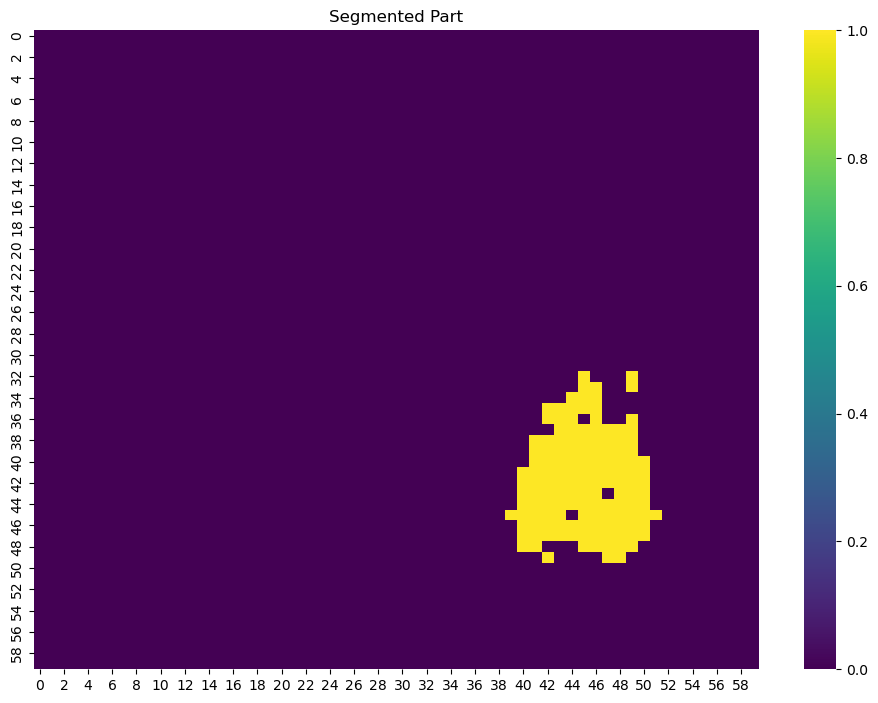

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the matrix
plt.figure(figsize=(11.7, 8.3))  # A4 size in inches
sns.heatmap(d, cmap="viridis")
plt.title("Segmented Part")

In [106]:
# go with in built function 

In [74]:
import math
import numpy as np

def calculate_weight(value1, value2, pos1, pos2, sigma=20):
    """
    Calculate the weight between two pixels using the given intensity values and positions.
    
    :param value1: RGB values of the first pixel
    :param value2: RGB values of the second pixel
    :param pos1: (x, y) position of the first pixel
    :param pos2: (x, y) position of the second pixel
    :param sigma: Standard deviation for the Gaussian function
    :return: Weight between the two pixels
    """
    # Calculate intensity difference squared
    intensity_diff_squared = sum((a - b) ** 2 for a, b in zip(value1, value2))
    
    # Calculate Euclidean distance between positions
    distance = math.sqrt(sum((a - b) ** 2 for a, b in zip(pos1, pos2)))
    
    # Avoid division by zero in case of the same pixel
    if distance == 0:
        distance = 1e-5  # A small value to avoid division by zero

    # Calculate weight using the Gaussian function and the inverse of the distance
    weight = math.exp(-intensity_diff_squared / (2 * sigma ** 2)) * (1 / distance)
    
    return weight

In [75]:
for x in range(60):
    for y in range(60):
        node_id = (x, y)
        values = tuple(img[x, y])
        G.add_node(node_id, values=values)

#edges
for x in range(60):
    for y in range(60):
        for px in range(x, 60):
            for py in range(60):
                if px == x and py <= y:
                    # Avoid adding an edge twice in the case of the same row
                    continue
                node_id = (x, y)
                other_node_id = (px, py)
                weight = calculate_weight(G.nodes[node_id]['values'], 
                                          G.nodes[other_node_id]['values'],
                                          node_id,
                                          other_node_id)
                G.add_edge(node_id, other_node_id, weight=weight)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

C:\Users\bathu\AppData\Local\Temp\ipykernel_32296\4066335627.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  intensity_diff_squared = sum((a - b) ** 2 for a, b in zip(value1, value2))


Number of nodes: 3600
Number of edges: 6478200


In [76]:
size = 60
W = np.zeros((size * size, size * size))
D = np.zeros((size * size, size * size))

for i, node_i in enumerate(G.nodes()):
    for j, node_j in enumerate(G.nodes()):
        if G.has_edge(node_i, node_j):
            W[i, j] = G[node_i][node_j]['weight']
            D[i, i] += G[node_i][node_j]['weight']

In [77]:
df = pd.DataFrame(W)

Text(0.5, 1.0, 'Weighted Adjacency Matrix')

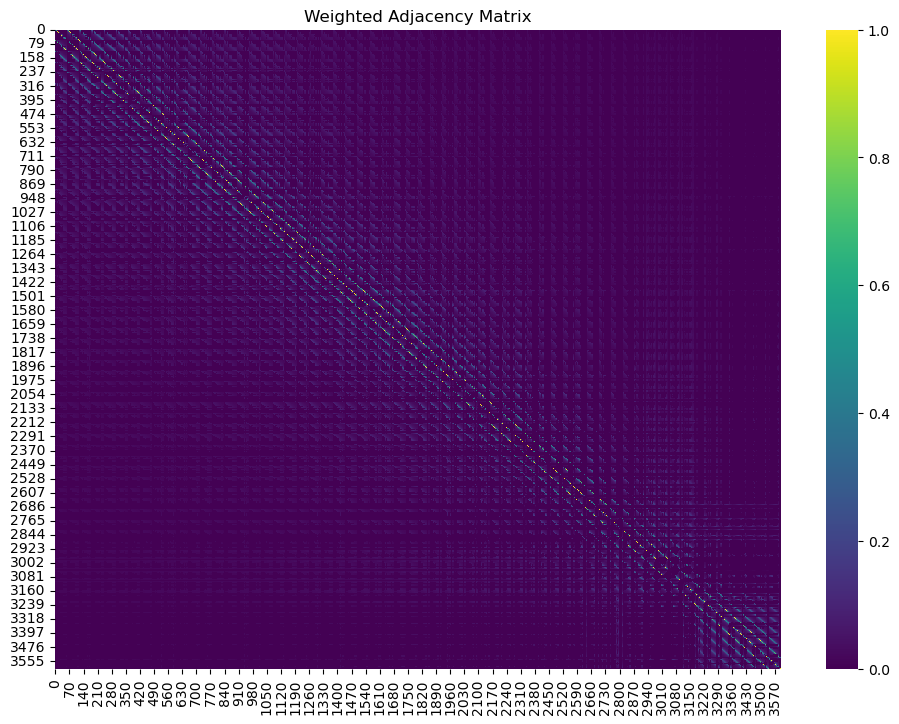

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11.7, 8.3))  
sns.heatmap(df, cmap="viridis")
plt.title("Weighted Adjacency Matrix")

In [79]:
from sklearn.cluster import SpectralClustering

def cluster_graph(adjacency_matrix):
    adjacency_matrix = np.array(adjacency_matrix)
    
    spectral = SpectralClustering(n_clusters=2, affinity='precomputed', assign_labels='kmeans')
    
    labels = spectral.fit_predict(adjacency_matrix)
    
    return labels

In [80]:
clusters = cluster_graph(W)
print(clusters)

C:\Users\bathu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


[0 0 0 ... 0 0 0]


In [81]:
sum(clusters)

181

In [82]:
reshaped_assignments = clusters.reshape((60, 60))


In [83]:
d = pd.DataFrame(reshaped_assignments)

Text(0.5, 1.0, 'Segmented Part')

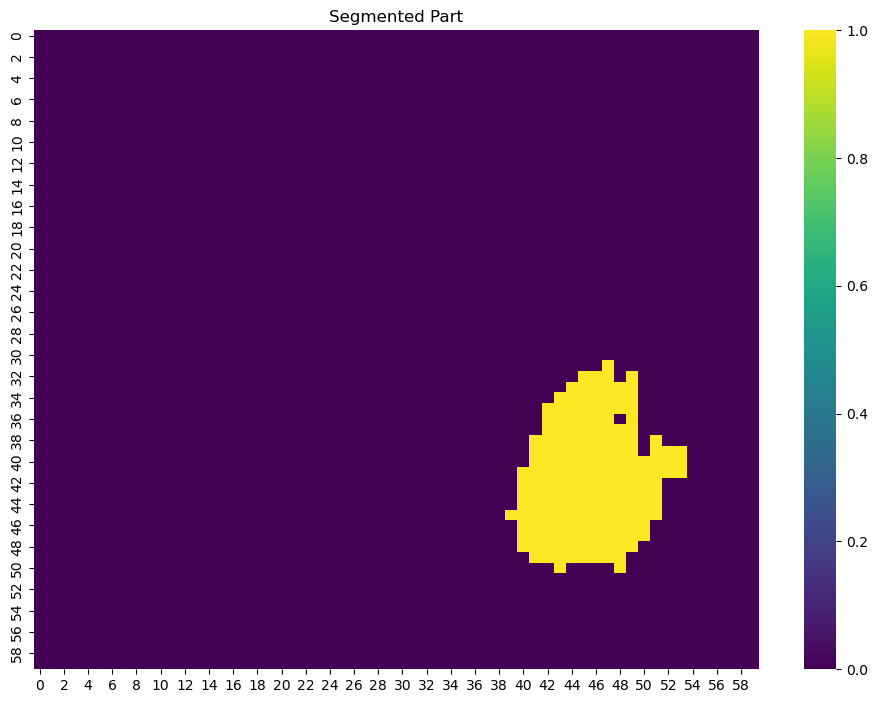

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the matrix
plt.figure(figsize=(11.7, 8.3))  # A4 size in inches
sns.heatmap(d, cmap="viridis")
plt.title("Segmented Part")

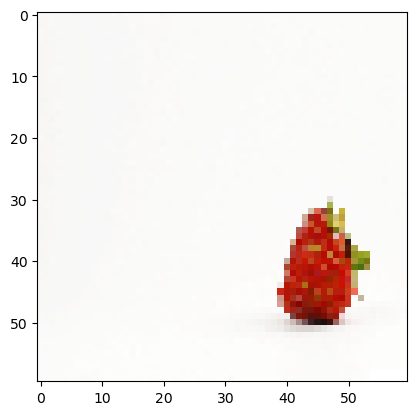

In [166]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [167]:
cat = preprocessing(image_cat)

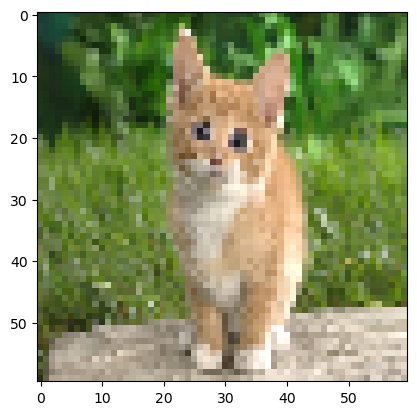

In [168]:
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))


In [169]:
for x in range(60):
    for y in range(60):
        node_id = (x, y)
        values = tuple(cat[x, y])
        G.add_node(node_id, values=values)

#edges
for x in range(60):
    for y in range(60):
        for px in range(x, 60):
            for py in range(60):
                if px == x and py <= y:
                    # Avoid adding an edge twice in the case of the same row
                    continue
                node_id = (x, y)
                other_node_id = (px, py)
                weight = calculate_weight(G.nodes[node_id]['values'], 
                                          G.nodes[other_node_id]['values'],
                                          node_id,
                                          other_node_id)
                G.add_edge(node_id, other_node_id, weight=weight)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

C:\Users\bathu\AppData\Local\Temp\ipykernel_43692\4066335627.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  intensity_diff_squared = sum((a - b) ** 2 for a, b in zip(value1, value2))


Number of nodes: 3600
Number of edges: 6478200


In [170]:
size = 60
W = np.zeros((size * size, size * size))
D = np.zeros((size * size, size * size))

for i, node_i in enumerate(G.nodes()):
    for j, node_j in enumerate(G.nodes()):
        if G.has_edge(node_i, node_j):
            W[i, j] = G[node_i][node_j]['weight']
            D[i, i] += G[node_i][node_j]['weight']

In [171]:
df = pd.DataFrame(W)

Text(0.5, 1.0, 'Weighted Adjacency Matrix')

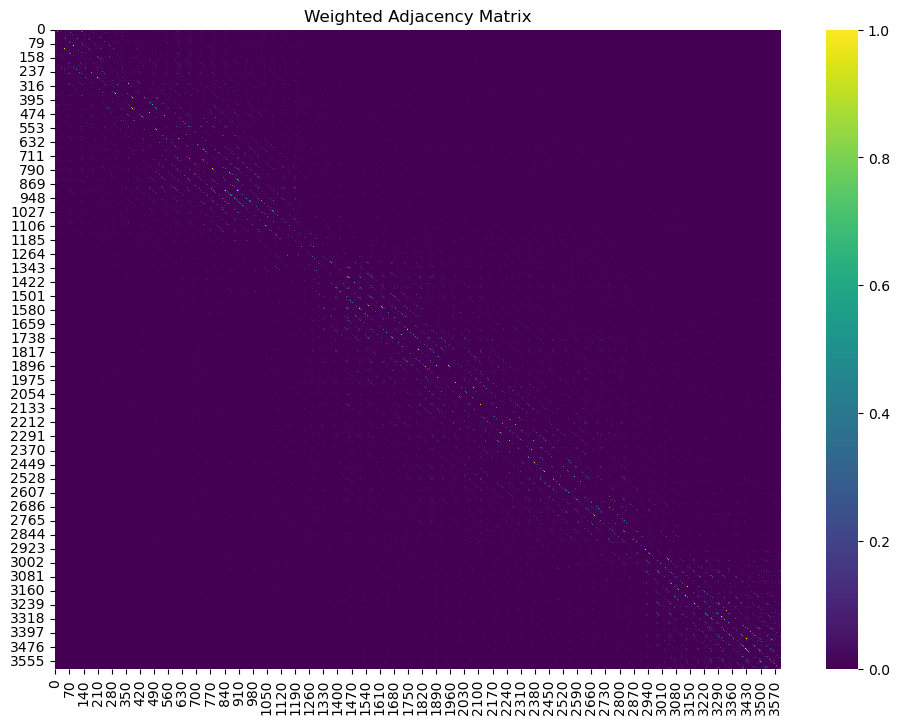

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11.7, 8.3))  
sns.heatmap(df, cmap="viridis")
plt.title("Weighted Adjacency Matrix")

In [173]:
from sklearn.cluster import SpectralClustering

def cluster_graph(adjacency_matrix):
    adjacency_matrix = np.array(adjacency_matrix)
    
    spectral = SpectralClustering(n_clusters=2, affinity='precomputed', assign_labels='kmeans')
    
    labels = spectral.fit_predict(adjacency_matrix)
    
    return labels

In [174]:
clusters = cluster_graph(W)
print(clusters)

C:\Users\bathu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


[0 0 0 ... 1 1 1]


In [175]:
sum(clusters)

1408

In [176]:
reshaped_assignments = clusters.reshape((60, 60))


In [177]:
d = pd.DataFrame(reshaped_assignments)

Text(0.5, 1.0, 'Segmented Part')

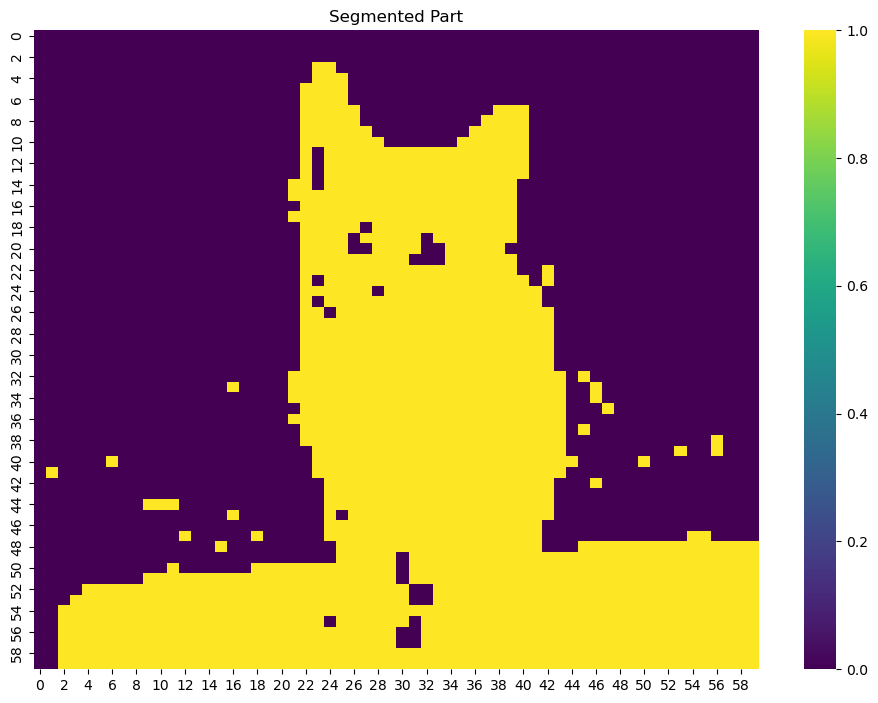

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the matrix
plt.figure(figsize=(11.7, 8.3))  # A4 size in inches
sns.heatmap(d, cmap="viridis")
plt.title("Segmented Part")